In [260]:
import json
import time
import plotly.express as px  
# Opening JSON file
f = open('events.json')
  
# Returns JSON object as a dictionary
data = json.load(f)

In [261]:
# Iterating through the json list
for event in data:
    print(event)
  
# Closing file
#f.close()

{'eventName': 'PX Down', 'start': 1662386696, 'finish': 1662386697, 'startUTC': '1970-01-01 00:00:00 +0000 UTC', 'finishUTC': '2022-09-05 14:04:57 +0000 UTC', 'eventSeverity': 'error', 'objects': [{'objectFullName': 'ip-10-13-112-170.pwx.dev.purestorage.com', 'objectType': 'node', 'objectName': 'ip-10-13-112-170.pwx.dev.purestorage.com'}, {'objectFullName': 'Portworx', 'objectType': 'Portworx', 'objectName': 'Portworx'}]}
{'eventName': 'PX Down', 'start': 1662389588, 'finish': 1662389801, 'startUTC': '2022-09-05 14:53:08 +0000 UTC', 'finishUTC': '2022-09-05 14:56:41 +0000 UTC', 'eventSeverity': 'error', 'objects': [{'objectFullName': 'ip-10-13-112-170.pwx.dev.purestorage.com', 'objectType': 'node', 'objectName': 'ip-10-13-112-170.pwx.dev.purestorage.com'}, {'objectFullName': 'Portworx', 'objectType': 'Portworx', 'objectName': 'Portworx'}]}
{'eventName': 'PX Down', 'start': 1662390578, 'finish': 1662390685, 'startUTC': '2022-09-05 15:09:38 +0000 UTC', 'finishUTC': '2022-09-05 15:11:25 +

In [262]:
 import datetime
class Events:
    def __init__(self, node, start, finish, eventName, eventSeverity, eventObject):
        self.node = node
        self.start = start
        self.finish = finish
        self.eventName=eventName
        self.eventSeverity=eventSeverity
        self.eventObject=eventObject
    def __init__(self):
        self.node = ""
        self.start = ""
        self.finish = ""
        self.eventName= ""
        self.eventSeverity= ""
        self.eventObject= ""
    def to_dict(self):
        my_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1347517370))
        datetime.datetime.fromtimestamp(1347517370).strftime('%Y-%m-%d %H:%M:%S')
        
        start = datetime.datetime.fromtimestamp(int(self.start)).strftime('%Y-%m-%d %H:%M:%S')
        end = datetime.datetime.fromtimestamp(int(self.finish)).strftime('%Y-%m-%d %H:%M:%S')
        return {
            'node': self.node,
            'start': start ,
            'finish': end,
            'eventName': self.eventName,
            'eventSeverity': self.eventSeverity,
            'Event Source': self.eventObject
        }

In [263]:
# Create an event list to be used as dataframe
eventList = []

totalNodes = set()
for events in data:
    e = Events()        
    e.start=events['start']
    e.finish=events['finish']
    e.eventName=events['eventName']
    e.eventSeverity=events['eventSeverity']
    
    objects = events['objects']
    #objectList = []
    objectString = ""
    for obj in objects:
        # Update node type to separate graphs
        if obj['objectType'] == "node":
            e.node = obj['objectFullName']
            totalNodes.add(e.node )
        else:
            #objectList.append(obj['objectType'] + ":" + obj['objectName'])
            objectString +=  " " + obj['objectType'] + ":" + obj['objectName']
    e.eventObject =  objectString
    eventList.append(e.to_dict())

print(eventList)

[{'node': 'ip-10-13-112-170.pwx.dev.purestorage.com', 'start': '2022-09-05 07:04:56', 'finish': '2022-09-05 07:04:57', 'eventName': 'PX Down', 'eventSeverity': 'error', 'Event Source': ' Portworx:Portworx'}, {'node': 'ip-10-13-112-170.pwx.dev.purestorage.com', 'start': '2022-09-05 07:53:08', 'finish': '2022-09-05 07:56:41', 'eventName': 'PX Down', 'eventSeverity': 'error', 'Event Source': ' Portworx:Portworx'}, {'node': 'ip-10-13-112-170.pwx.dev.purestorage.com', 'start': '2022-09-05 08:09:38', 'finish': '2022-09-05 08:11:25', 'eventName': 'PX Down', 'eventSeverity': 'error', 'Event Source': ' Portworx:Portworx'}, {'node': 'ip-10-13-112-170.pwx.dev.purestorage.com', 'start': '2022-09-05 08:11:27', 'finish': '2022-09-05 08:11:28', 'eventName': 'Mount Setup', 'eventSeverity': 'error', 'Event Source': ' pod:0454503f... volume:pvc-0d81053d...'}, {'node': 'ip-10-13-112-170.pwx.dev.purestorage.com', 'start': '2022-09-05 08:11:31', 'finish': '2022-09-05 08:11:32', 'eventName': 'Mount Setup', 

In [264]:
import pandas as pd
import plotly.graph_objs as go
df = pd.DataFrame(eventList)
df.head(100)

,node,start,finish,eventName,eventSeverity,Event Source
0,ip-10-13-112-170.pwx.dev.purestorage.com,2022-09-05 07:04:56,2022-09-05 07:04:57,PX Down,error,Portworx:Portworx
1,ip-10-13-112-170.pwx.dev.purestorage.com,2022-09-05 07:53:08,2022-09-05 07:56:41,PX Down,error,Portworx:Portworx
2,ip-10-13-112-170.pwx.dev.purestorage.com,2022-09-05 08:09:38,2022-09-05 08:11:25,PX Down,error,Portworx:Portworx
3,ip-10-13-112-170.pwx.dev.purestorage.com,2022-09-05 08:11:27,2022-09-05 08:11:28,Mount Setup,error,pod:0454503f... volume:pvc-0d81053d...
4,ip-10-13-112-170.pwx.dev.purestorage.com,2022-09-05 08:11:31,2022-09-05 08:11:32,Mount Setup,error,pod:0454503f... volume:pvc-0d81053d...
5,ip-10-13-112-170.pwx.dev.purestorage.com,2022-09-05 08:11:32,2022-09-05 08:11:33,Mount Setup,error,pod:0454503f... volume:pvc-0d81053d...
6,ip-10-13-112-170.pwx.dev.purestorage.com,2022-09-05 08:11:40,2022-09-05 08:11:41,Mount Setup,error,pod:0454503f... volume:pvc-0d81053d...
7,ip-10-13-112-170.pwx.dev.purestorage.com,2022-09-05 08:11:43,2022-09-05 08:11:44,Mount Setup,error,pod:0454503f... volume:pvc-0d81053d...
8,ip-10-13-112-170.pwx.dev.purestorage.com,2022-09-05 08:11:51,2022-09-05 08:11:52,Mount Setup,error,pod:0454503f... volume:pvc-0d81053d...
9,ip-10-13-112-170.pwx.dev.purestorage.com,2022-09-05 08:11:53,2022-09-05 08:11:54,Mount Setup,error,pod:0454503f... volume:pvc-0d81053d...


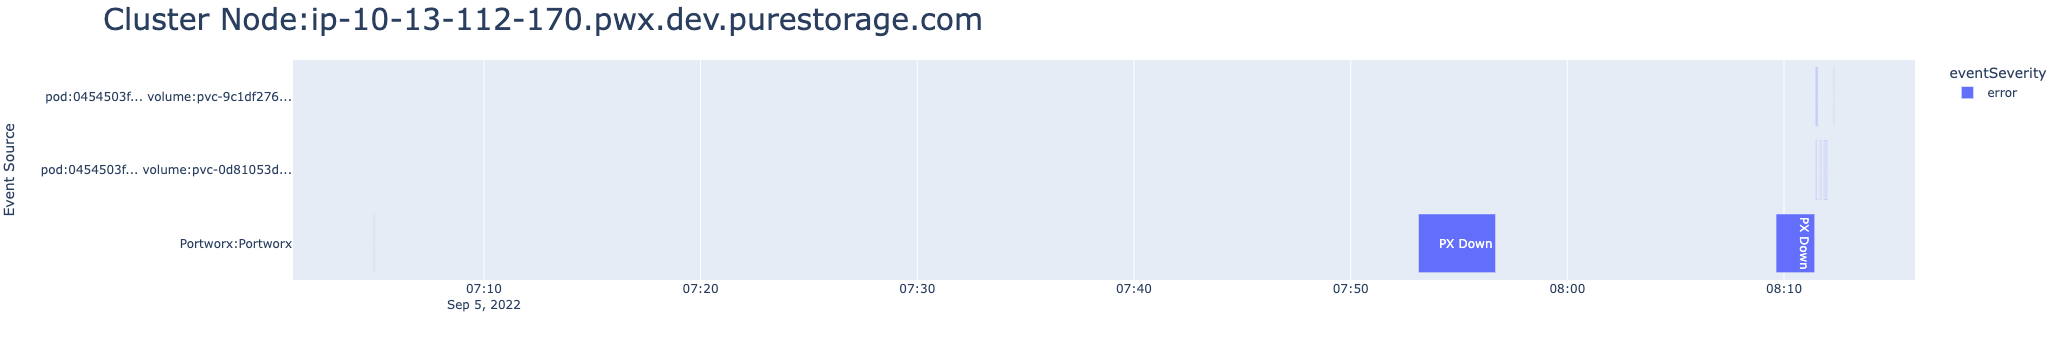

In [274]:
for name, group in df.groupby('node'):
    heading = "Cluster Node:" + name
    group.head()
    fig= px.timeline(group, x_start="start", x_end="finish", y="Event Source", color="eventSeverity", text="eventName")
    fig.update_layout(title_text=heading,
                  title_font_size=30)
    fig.update_xaxes(showgrid=True)

    fig.update_traces(textposition='inside')
    fig.update_traces(textposition='inside', hovertemplate = "EventSeverity:")

    #fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up

    fig.show()


In [ ]:
fig.write_html("./file.html")


In [ ]:
f.close()